In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Colab'de Google Drive bağlantısını yap
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Veriyi yükle
veri_yolu = "/content/drive/MyDrive/VeriMadenciligi/arac_ilanlari.csv"

# Veriyi DataFrame'e yükle
veri = pd.read_csv(veri_yolu)

In [4]:
# Verinin ilk 5 satırını göster
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'..."
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',..."
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '..."
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sedan 35 TFSI', 'Marka': 'Audi',...","İstanbul, Sarıyer","['33.000 km', '2020 model', 'Benzin', '150 hp'..."
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.4 TDI Trendline', 'Marka': 'Volks...","Kırklareli, Lüleburgaz","['125.000 km', '2015 model', 'Dizel', '75 hp',..."


In [5]:
veri.shape

(556756, 9)

In [6]:
# Veri seti hakkında genel bilgiler
print("##################### Bilgiler #####################")
print(veri.info())

##################### Bilgiler #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556756 entries, 0 to 556755
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ilan_id           556756 non-null  int64  
 1   ilan_basligi      556756 non-null  object 
 2   fiyat             556756 non-null  float64
 3   fiyat_kuru        556756 non-null  object 
 4   ilan_tarihi       556756 non-null  object 
 5   ilan_kategorisi   556756 non-null  object 
 6   arac_tagleri      556756 non-null  object 
 7   ilan_konumu       556756 non-null  object 
 8   arac_ozellikleri  556756 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 38.2+ MB
None


In [7]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
ilan_id,556756.0,1.088248e+09,3.167714e+07,552315197.0,1.069335e+09,1.093235e+09,1.112327e+09,1.131802e+09
fiyat,556756.0,8.081474e+05,1.101140e+07,1.0,3.550000e+05,5.550000e+05,8.100000e+05,1.480000e+09


In [8]:
# Veri seti için genel bilgiler
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [9]:
check_df(veri, head=5)

##################### Shape #####################
(556756, 9)
##################### Types #####################
ilan_id               int64
ilan_basligi         object
fiyat               float64
fiyat_kuru           object
ilan_tarihi          object
ilan_kategorisi      object
arac_tagleri         object
ilan_konumu          object
arac_ozellikleri     object
dtype: object
##################### Head #####################
      ilan_id                                       ilan_basligi      fiyat  \
0  1080850207  DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...   830000.0   
1  1101850722           KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.   905000.0   
2  1101855061                 HATASIZ AYARINDA MASRAFSIZ AUDİ A3   695000.0   
3  1101851921  2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...  1380000.0   
4  1090594643                                         2015 MODEL   530000.0   

  fiyat_kuru                 ilan_tarihi  \
0         TL  2023-05-26 09:23:29.000000   
1         

In [10]:
# Eksik değerlerin kontrolü
veri.isnull().sum()

ilan_id             0
ilan_basligi        0
fiyat               0
fiyat_kuru          0
ilan_tarihi         0
ilan_kategorisi     0
arac_tagleri        0
ilan_konumu         0
arac_ozellikleri    0
dtype: int64

In [11]:
# Kategorik sütunları seçme
kategorik_sutunlar = veri.select_dtypes(include=['object']).columns.tolist()
print(kategorik_sutunlar)

['ilan_basligi', 'fiyat_kuru', 'ilan_tarihi', 'ilan_kategorisi', 'arac_tagleri', 'ilan_konumu', 'arac_ozellikleri']


In [12]:
# Nümerik sütunları seçme
numerik_sutunlar = veri.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerik_sutunlar)

['ilan_id', 'fiyat']


In [13]:
import ast

# 'arac_tagleri' sütunundaki sözlük yapısını parse etme
veri['arac_tagleri'] = veri['arac_tagleri'].apply(ast.literal_eval)

# 'Model' anahtarına karşılık gelen değerleri çıkararak yeni bir sütun oluşturma
veri['Araç_Modeli'] = veri['arac_tagleri'].apply(lambda x: x['Model'])

In [14]:
# Araç modellerinin sayısını yazdırma
model_sayisi = len(veri['Araç_Modeli'].unique())
print(f"Araç modeli sayısı: {model_sayisi}")

Araç modeli sayısı: 266


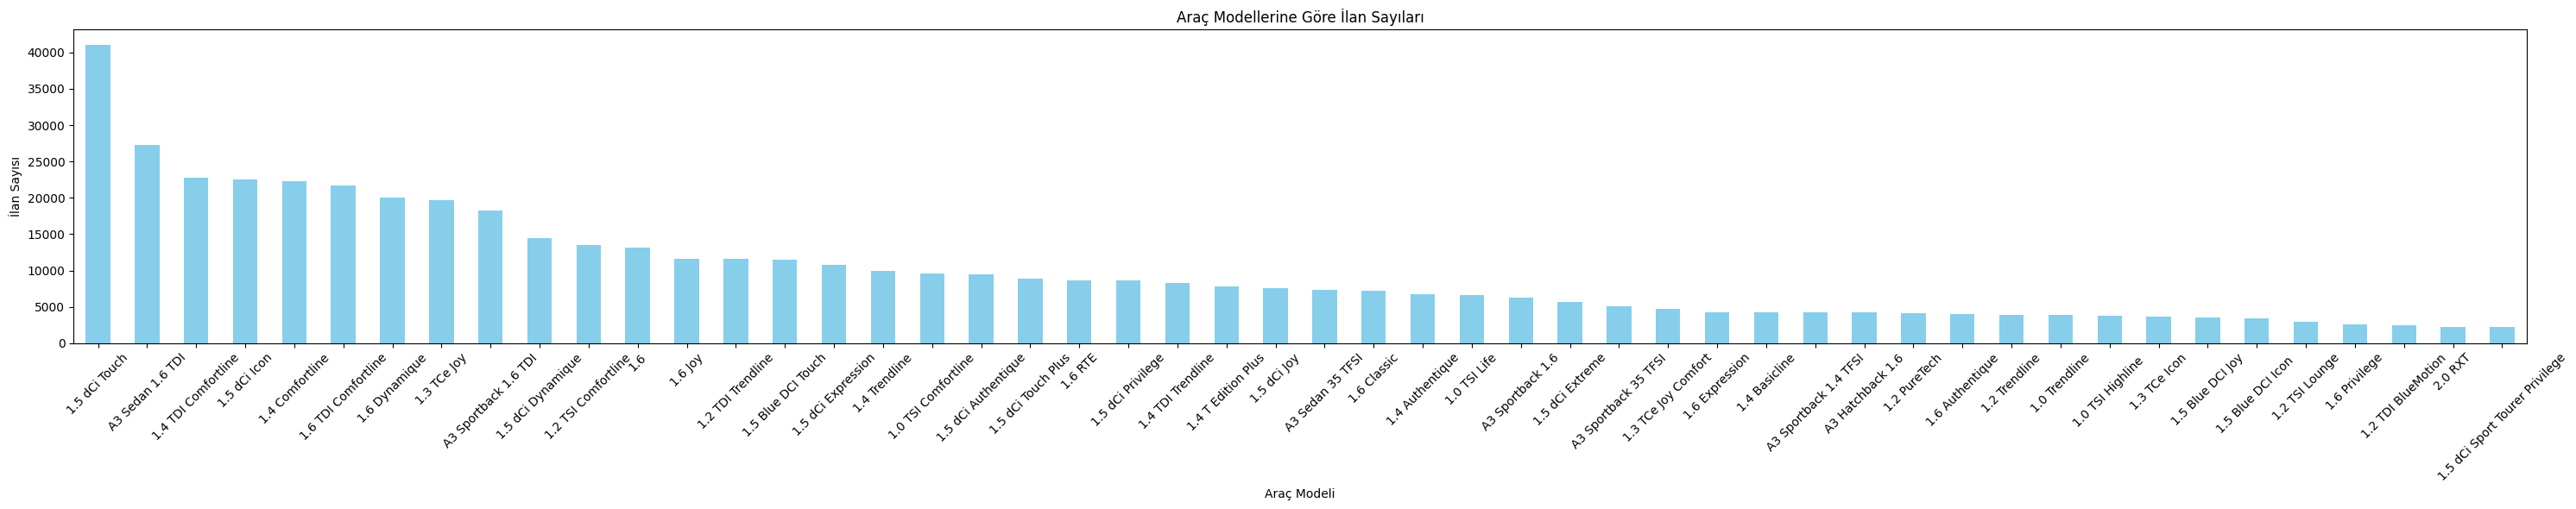

In [15]:
import matplotlib.pyplot as plt

# Araç modellerine göre ilan sayılarını hesaplama
ilan_sayilari = veri['Araç_Modeli'].value_counts()

# Grafik oluşturma
plt.figure(figsize=(30, 6))
ilan_sayilari.head(50).plot(kind='bar', color='skyblue')
plt.title('Araç Modellerine Göre İlan Sayıları')
plt.xlabel('Araç Modeli')
plt.ylabel('İlan Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Araç modellerine göre fiyatları gruplayıp sıralama
fiyatlar_sirali = veri.groupby('Araç_Modeli')['fiyat'].mean().sort_values()

# Oluşan veriyi gösterme
print(fiyatlar_sirali)

Araç_Modeli
1.4 CL                          7.250000e+04
1.3 GT                          1.066250e+05
1.9 SDI Highline                1.250000e+05
1.3 CL                          1.608333e+05
1.4 RTE                         1.608462e+05
                                    ...     
1.5 dCi Play                    3.174649e+06
1.5 dCi Sport Tourer GT-Line    3.328756e+06
1.5 dCi Sport Tourer Touch      4.579464e+06
1.6 GTI                         6.533873e+06
1.2                             3.139719e+07
Name: fiyat, Length: 266, dtype: float64


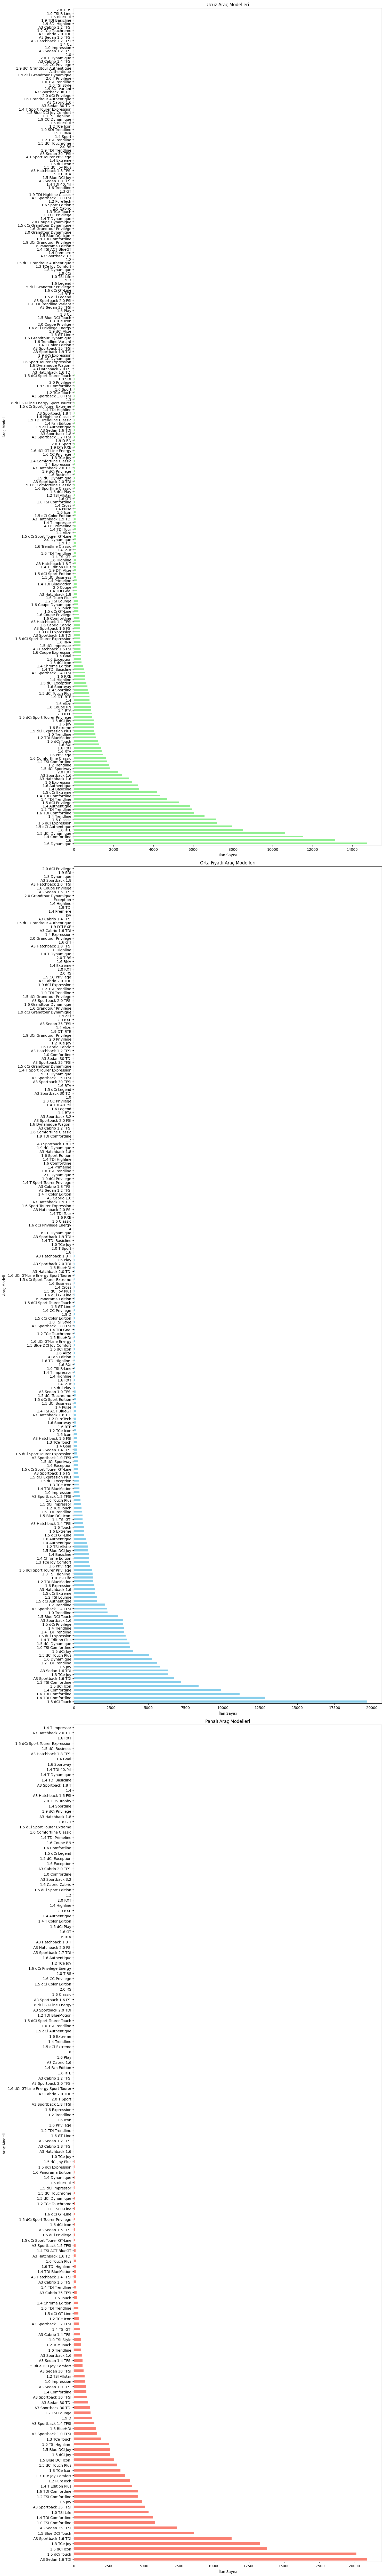

In [17]:
# Fiyatları kategorilere göre ayırma
ucuz = veri[veri['fiyat'] < veri['fiyat'].quantile(1/3)]
orta = veri[(veri['fiyat'] >= veri['fiyat'].quantile(1/3)) & (veri['fiyat'] < veri['fiyat'].quantile(2/3))]
pahali = veri[veri['fiyat'] >= veri['fiyat'].quantile(2/3)]

# Her kategori için ayrı grafikler oluşturma
plt.figure(figsize=(15, 100))

plt.subplot(3, 1, 1)
ucuz['Araç_Modeli'].value_counts().plot(kind='barh', color='lightgreen')
plt.title('Ucuz Araç Modelleri')
plt.xlabel('İlan Sayısı')
plt.ylabel('Araç Modeli')

plt.subplot(3, 1, 2)
orta['Araç_Modeli'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Orta Fiyatlı Araç Modelleri')
plt.xlabel('İlan Sayısı')
plt.ylabel('Araç Modeli')

plt.subplot(3, 1, 3)
pahali['Araç_Modeli'].value_counts().plot(kind='barh', color='salmon')
plt.title('Pahalı Araç Modelleri')
plt.xlabel('İlan Sayısı')
plt.ylabel('Araç Modeli')

plt.tight_layout()
plt.show()

In [18]:
veri['Araç_Markası'] = veri['arac_tagleri'].apply(lambda x: x.get('Marka') if 'Marka' in x else None)

In [19]:
unique_markalar = veri['Araç_Markası'].nunique()
print("Unique araç markası sayısı:", unique_markalar)
unique_markalar = veri['Araç_Markası'].unique()
print("Araç markaları:")
print(unique_markalar)

Unique araç markası sayısı: 6
Araç markaları:
['Renault' 'Audi' 'Volkswagen' 'Opel' 'Citroën' 'Isuzu' None]


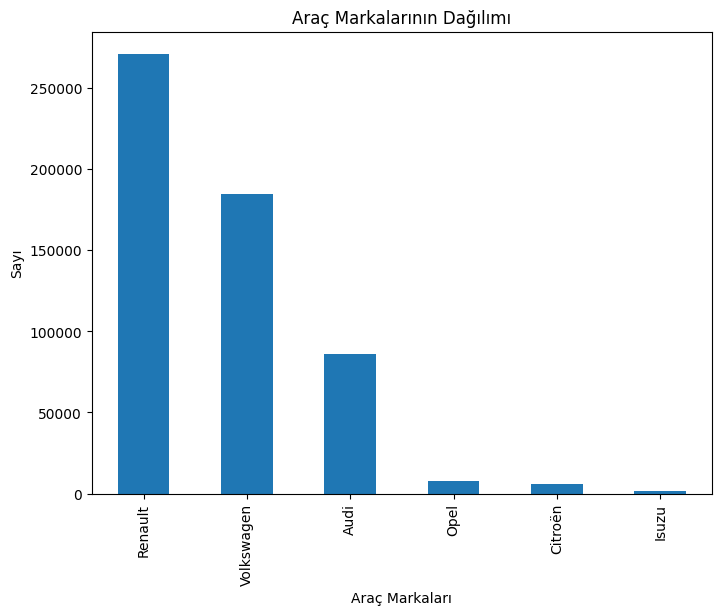

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
veri['Araç_Markası'].value_counts().plot(kind='bar')
plt.title('Araç Markalarının Dağılımı')
plt.xlabel('Araç Markaları')
plt.ylabel('Sayı')
plt.show()

In [21]:
veri['Araç_Seri'] = veri['arac_tagleri'].apply(lambda x: x.get('Seri') if 'Seri' in x else None)

In [22]:
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri,Araç_Modeli,Araç_Markası,Araç_Seri
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'...",1.5 dCi Icon,Renault,Megane
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',...",1.5 dCi Icon,Renault,Megane
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '...",A3 Sportback 1.6,Audi,A3
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sedan 35 TFSI', 'Marka': 'Audi',...","İstanbul, Sarıyer","['33.000 km', '2020 model', 'Benzin', '150 hp'...",A3 Sedan 35 TFSI,Audi,A3
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.4 TDI Trendline', 'Marka': 'Volks...","Kırklareli, Lüleburgaz","['125.000 km', '2015 model', 'Dizel', '75 hp',...",1.4 TDI Trendline,Volkswagen,Polo


In [23]:
# 'arac_tagleri' sütununu sil
veri.drop(columns=['arac_tagleri'], inplace=True)
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,ilan_konumu,arac_ozellikleri,Araç_Modeli,Araç_Markası,Araç_Seri
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'...",1.5 dCi Icon,Renault,Megane
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',...",1.5 dCi Icon,Renault,Megane
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '...",A3 Sportback 1.6,Audi,A3
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","İstanbul, Sarıyer","['33.000 km', '2020 model', 'Benzin', '150 hp'...",A3 Sedan 35 TFSI,Audi,A3
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","Kırklareli, Lüleburgaz","['125.000 km', '2015 model', 'Dizel', '75 hp',...",1.4 TDI Trendline,Volkswagen,Polo


In [24]:
# 'ilan_kategorisi' sütununu sil
veri.drop(columns=['ilan_kategorisi'], inplace=True)
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_konumu,arac_ozellikleri,Araç_Modeli,Araç_Markası,Araç_Seri
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'...",1.5 dCi Icon,Renault,Megane
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',...",1.5 dCi Icon,Renault,Megane
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '...",A3 Sportback 1.6,Audi,A3
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer","['33.000 km', '2020 model', 'Benzin', '150 hp'...",A3 Sedan 35 TFSI,Audi,A3
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz","['125.000 km', '2015 model', 'Dizel', '75 hp',...",1.4 TDI Trendline,Volkswagen,Polo


In [25]:
# Parantezleri kaldırma ve virgüle göre ayrılan özellikleri gruplama
veri['arac_ozellikleri'] = veri['arac_ozellikleri'].str.replace(r'[\[\]]', '')  # Köşeli parantezleri kaldırma
ozellikler = veri['arac_ozellikleri'].str.split(', ', expand=True)

# Virgüle göre ayrılan özellikleri gruplayarak ayırma
ozellikler = veri['arac_ozellikleri'].str.split(', ', expand=True)

# Sütun adlarını belirleme
ozellikler.columns = ['Kilometre', 'Model_Yili', 'Yakit_Tipi', 'Motor_Gucu', 'Vites_Tipi']

# Verileri birleştirme
veri = pd.concat([veri, ozellikler], axis=1)

In [26]:
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_konumu,arac_ozellikleri,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Model_Yili,Yakit_Tipi,Motor_Gucu,Vites_Tipi
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye","'143.000 km', '2016 model', 'Dizel', '110 hp',...",1.5 dCi Icon,Renault,Megane,'143.000 km','2016 model','Dizel','110 hp','Otomatik'
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"İzmir, Konak","'80.000 km', '2017 model', 'Dizel', '110 hp', ...",1.5 dCi Icon,Renault,Megane,'80.000 km','2017 model','Dizel','110 hp','Otomatik'
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"Adana, Seyhan","'177.000 km', '2011 model', 'Benzin & LPG', '1...",A3 Sportback 1.6,Audi,A3,'177.000 km','2011 model','Benzin & LPG','102 hp','Manuel'
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer","'33.000 km', '2020 model', 'Benzin', '150 hp',...",A3 Sedan 35 TFSI,Audi,A3,'33.000 km','2020 model','Benzin','150 hp','Otomatik'
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz","'125.000 km', '2015 model', 'Dizel', '75 hp', ...",1.4 TDI Trendline,Volkswagen,Polo,'125.000 km','2015 model','Dizel','75 hp','Manuel'


In [27]:
# 'arac_ozellikleri' sütununu sil
veri.drop(columns=['arac_ozellikleri'], inplace=True)
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_konumu,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Model_Yili,Yakit_Tipi,Motor_Gucu,Vites_Tipi
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye",1.5 dCi Icon,Renault,Megane,'143.000 km','2016 model','Dizel','110 hp','Otomatik'
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"İzmir, Konak",1.5 dCi Icon,Renault,Megane,'80.000 km','2017 model','Dizel','110 hp','Otomatik'
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"Adana, Seyhan",A3 Sportback 1.6,Audi,A3,'177.000 km','2011 model','Benzin & LPG','102 hp','Manuel'
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer",A3 Sedan 35 TFSI,Audi,A3,'33.000 km','2020 model','Benzin','150 hp','Otomatik'
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz",1.4 TDI Trendline,Volkswagen,Polo,'125.000 km','2015 model','Dizel','75 hp','Manuel'


In [28]:
veri['Kilometre'] = veri['Kilometre'].str.replace(r"[^\w\s]", "")
veri['Model_Yili'] = veri['Model_Yili'].str.replace(r"[^\w\s]", "")
veri['Yakit_Tipi'] = veri['Yakit_Tipi'].str.replace(r"[^\w\s]", "")
veri['Motor_Gucu'] = veri['Motor_Gucu'].str.replace(r"[^\w\s]", "")
veri['Vites_Tipi'] = veri['Vites_Tipi'].str.replace(r"[^\w\s]", "")

In [29]:
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_konumu,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Model_Yili,Yakit_Tipi,Motor_Gucu,Vites_Tipi
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye",1.5 dCi Icon,Renault,Megane,143000 km,2016 model,Dizel,110 hp,Otomatik
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"İzmir, Konak",1.5 dCi Icon,Renault,Megane,80000 km,2017 model,Dizel,110 hp,Otomatik
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"Adana, Seyhan",A3 Sportback 1.6,Audi,A3,177000 km,2011 model,Benzin LPG,102 hp,Manuel
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer",A3 Sedan 35 TFSI,Audi,A3,33000 km,2020 model,Benzin,150 hp,Otomatik
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz",1.4 TDI Trendline,Volkswagen,Polo,125000 km,2015 model,Dizel,75 hp,Manuel


In [30]:
unique_fiyat_kuru = veri['fiyat_kuru'].unique()
print(unique_fiyat_kuru)

['TL']


In [31]:
# 'fiyat_kuru' sütununu sil
veri.drop(columns=['fiyat_kuru'], inplace=True)
veri.head()

,ilan_id,ilan_basligi,fiyat,ilan_tarihi,ilan_konumu,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Model_Yili,Yakit_Tipi,Motor_Gucu,Vites_Tipi
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye",1.5 dCi Icon,Renault,Megane,143000 km,2016 model,Dizel,110 hp,Otomatik
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,2023-05-26 09:23:13.000000,"İzmir, Konak",1.5 dCi Icon,Renault,Megane,80000 km,2017 model,Dizel,110 hp,Otomatik
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,2023-05-26 09:22:58.000000,"Adana, Seyhan",A3 Sportback 1.6,Audi,A3,177000 km,2011 model,Benzin LPG,102 hp,Manuel
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer",A3 Sedan 35 TFSI,Audi,A3,33000 km,2020 model,Benzin,150 hp,Otomatik
4,1090594643,2015 MODEL,530000.0,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz",1.4 TDI Trendline,Volkswagen,Polo,125000 km,2015 model,Dizel,75 hp,Manuel


In [32]:
# 'ilan_basligi' sütununu sil
veri.drop(columns=['ilan_basligi'], inplace=True)

In [33]:
# 'ilan_konumu' sütununu virgülle ayırarak yeni sütunlara atama
veri[['il', 'ilce']] = veri['ilan_konumu'].str.split(', ', expand=True)

In [34]:
# 'ilan_konumu' sütununu sil
veri.drop(columns=['ilan_konumu'], inplace=True)

In [35]:
veri['ilan_tarihi'] = pd.to_datetime(veri['ilan_tarihi'])

In [36]:
veri.head()

,ilan_id,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Model_Yili,Yakit_Tipi,Motor_Gucu,Vites_Tipi,il,ilce
0,1080850207,830000.0,2023-05-26 09:23:29,1.5 dCi Icon,Renault,Megane,143000 km,2016 model,Dizel,110 hp,Otomatik,İstanbul,Ümraniye
1,1101850722,905000.0,2023-05-26 09:23:13,1.5 dCi Icon,Renault,Megane,80000 km,2017 model,Dizel,110 hp,Otomatik,İzmir,Konak
2,1101855061,695000.0,2023-05-26 09:22:58,A3 Sportback 1.6,Audi,A3,177000 km,2011 model,Benzin LPG,102 hp,Manuel,Adana,Seyhan
3,1101851921,1380000.0,2023-05-26 09:22:35,A3 Sedan 35 TFSI,Audi,A3,33000 km,2020 model,Benzin,150 hp,Otomatik,İstanbul,Sarıyer
4,1090594643,530000.0,2023-05-26 09:21:55,1.4 TDI Trendline,Volkswagen,Polo,125000 km,2015 model,Dizel,75 hp,Manuel,Kırklareli,Lüleburgaz


In [37]:
# 'Kilometre' sütunundaki ' km' ifadesini kaldırarak boş olmayan değerleri sayısal formata dönüştürme
veri['Kilometre'] = veri['Kilometre'].str.replace(' km', '')
veri['Kilometre'] = pd.to_numeric(veri['Kilometre'], errors='coerce').astype('Int64')

In [38]:
# 'Model_Yili' sütununu sayısal formata dönüştürme
veri['Model_Yili'] = pd.to_numeric(veri['Model_Yili'].str.replace(' model', ''), errors='coerce').astype('Int64')

In [39]:
# 'Model_Gucu' sütununu sayısal formata dönüştürme
veri['Motor_Gucu'] = pd.to_numeric(veri['Motor_Gucu'].str.replace(' hp', ''), errors='coerce').astype('Int64')

In [40]:
veri.head()

,ilan_id,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Model_Yili,Yakit_Tipi,Motor_Gucu,Vites_Tipi,il,ilce
0,1080850207,830000.0,2023-05-26 09:23:29,1.5 dCi Icon,Renault,Megane,143000,2016,Dizel,110,Otomatik,İstanbul,Ümraniye
1,1101850722,905000.0,2023-05-26 09:23:13,1.5 dCi Icon,Renault,Megane,80000,2017,Dizel,110,Otomatik,İzmir,Konak
2,1101855061,695000.0,2023-05-26 09:22:58,A3 Sportback 1.6,Audi,A3,177000,2011,Benzin LPG,102,Manuel,Adana,Seyhan
3,1101851921,1380000.0,2023-05-26 09:22:35,A3 Sedan 35 TFSI,Audi,A3,33000,2020,Benzin,150,Otomatik,İstanbul,Sarıyer
4,1090594643,530000.0,2023-05-26 09:21:55,1.4 TDI Trendline,Volkswagen,Polo,125000,2015,Dizel,75,Manuel,Kırklareli,Lüleburgaz


In [41]:
# Kategorik veriler için genel bilgiler
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

# Sayısal veriler için genel bilgiler
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

            Araç_Markası      Ratio
Renault           271120  48.696377
Volkswagen        184385  33.117739
Audi               86109  15.466201
Opel                7824   1.405283
Citroën             5923   1.063841
Isuzu               1392   0.250020
##########################################


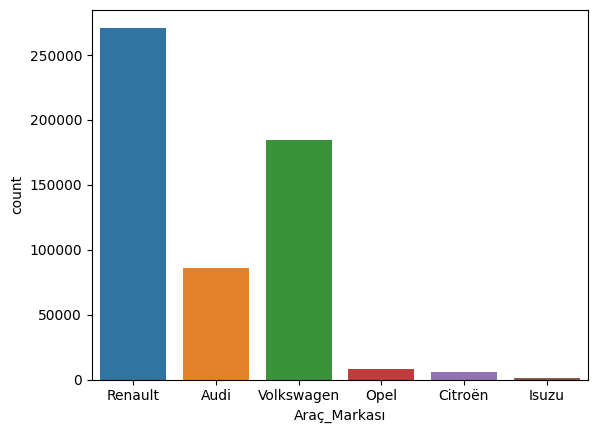

             Yakit_Tipi      Ratio
Dizel            283594  50.936856
Benzin           153611  27.590363
Benzin  LPG      117898  21.175883
Hybrid             1651   0.296539
Elektrik              1   0.000180
##########################################


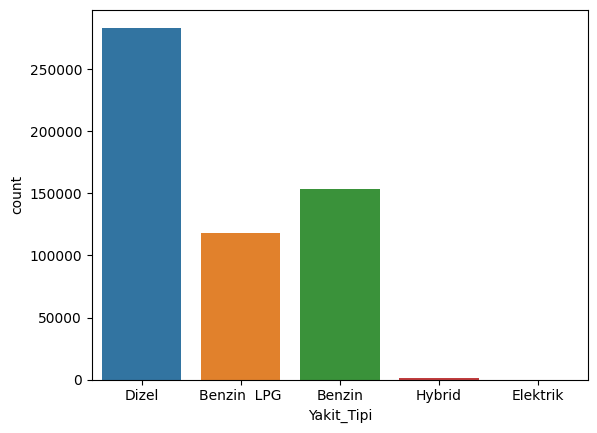

               Vites_Tipi      Ratio
Manuel             256947  46.150737
Otomatik           214375  38.504300
Yarı Otomatik       85373  15.334006
##########################################


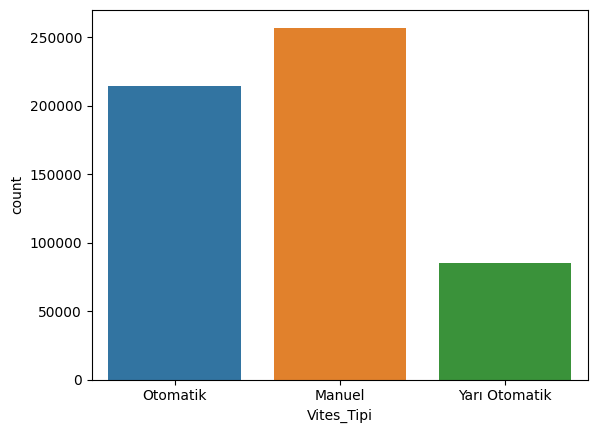

In [42]:
# Kategorik değişkenlerin özet bilgisi
cat_summary(veri, 'Araç_Markası', plot=True)
cat_summary(veri, 'Yakit_Tipi', plot=True)
cat_summary(veri, 'Vites_Tipi', plot=True)

count        556755.0
mean     152464.72744
std      91213.688167
min               0.0
5%            15000.0
10%           32000.0
20%           67000.0
30%           95900.0
40%          121000.0
50%          147000.0
60%          173000.0
70%          201000.0
80%          235000.0
90%          275000.0
95%          302165.0
99%          370000.0
max         1000000.0
Name: Kilometre, dtype: Float64


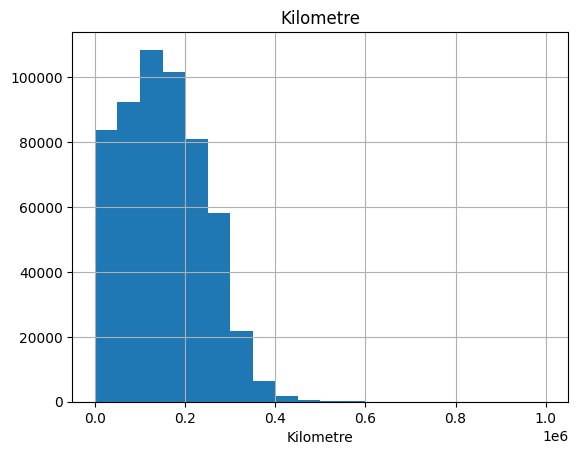

count       556755.0
mean     2012.604938
std         6.761917
min           1982.0
5%            1999.0
10%           2002.0
20%           2006.0
30%           2009.0
40%           2012.0
50%           2014.0
60%           2016.0
70%           2017.0
80%           2018.0
90%           2020.0
95%           2021.0
99%           2023.0
max           2023.0
Name: Model_Yili, dtype: Float64


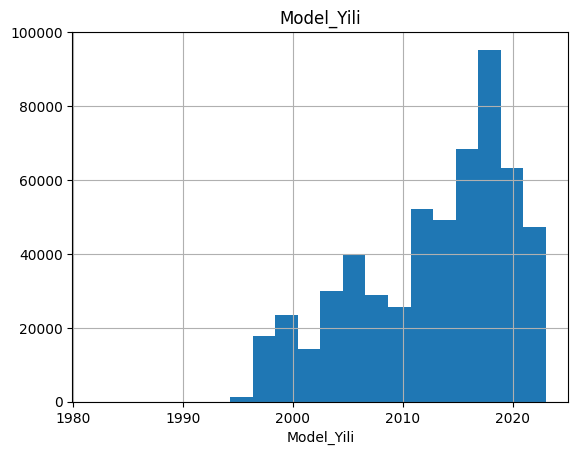

count      532348.0
mean     103.792788
std       19.334785
min            45.0
5%             75.0
10%            75.0
20%            86.0
30%            90.0
40%           100.0
50%           107.0
60%           110.0
70%           110.0
80%           115.0
90%           140.0
95%           140.0
99%           150.0
max           310.0
Name: Motor_Gucu, dtype: Float64


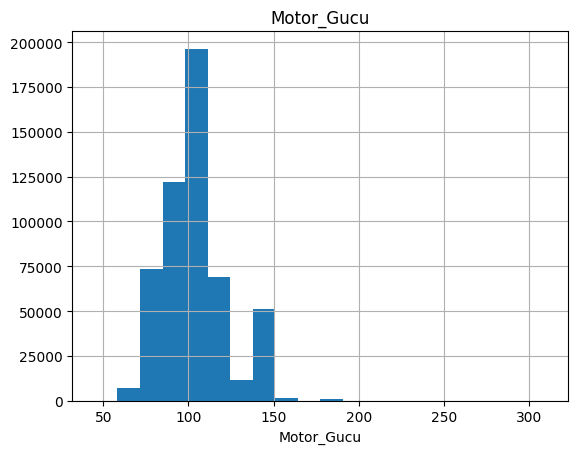

In [43]:
# Sayısal değişkenlerin özet bilgisi
num_summary(veri, 'Kilometre', plot=True)
num_summary(veri, 'Model_Yili', plot=True)
num_summary(veri, 'Motor_Gucu', plot=True)

In [44]:
# Target ile categorik değişken arasındaki ilişki
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

# Target ile numeric değişken arasındaki ilişki
def target_summary_with_num(dataframe, target, num_col):
    print(dataframe.groupby(target).agg({num_col: "mean"}), end="\n\n\n")

# Değişkenler arası korelasyonun incelenmesi:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe[num_cols].corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (6, 6)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [45]:
# Hedef değişken ile kategorik değişkenler arasındaki ilişki
target_summary_with_cat(veri, 'fiyat', 'Araç_Modeli')
target_summary_with_cat(veri, 'fiyat', 'Araç_Markası')
target_summary_with_cat(veri, 'fiyat', 'Yakit_Tipi')
target_summary_with_cat(veri, 'fiyat', 'Vites_Tipi')
target_summary_with_cat(veri, 'fiyat', 'il')
target_summary_with_cat(veri, 'fiyat', 'ilce')

                       TARGET_MEAN
Araç_Modeli                       
1.0                   5.885625e+05
1.0 Comfortline       6.670000e+05
1.0 Highline          6.625000e+05
1.0 Impression        7.606329e+05
1.0 TCe Joy           7.272404e+05
...                            ...
A3 Sportback 35 TFSI  1.555064e+06
A5 Sportback 2.7 TDI  1.049662e+06
Authentique           3.785000e+05
Exception             4.850000e+05
Joy                   5.200000e+05

[266 rows x 1 columns]


               TARGET_MEAN
Araç_Markası              
Audi          1.053942e+06
Citroën       1.121015e+06
Isuzu         1.992565e+06
Opel          1.056529e+06
Renault       7.818093e+05
Volkswagen    7.025615e+05


              TARGET_MEAN
Yakit_Tipi               
Benzin       9.603835e+05
Benzin  LPG  5.263903e+05
Dizel        8.380753e+05
Elektrik     1.200000e+06
Hybrid       1.623158e+06


                TARGET_MEAN
Vites_Tipi                 
Manuel         6.328398e+05
Otomatik       1.039026e+06
Yarı 

In [46]:
# Hedef değişken ile sayısal değişkenler arasındaki ilişki
target_summary_with_num(veri, 'fiyat', 'Kilometre')
target_summary_with_num(veri, 'fiyat', 'Model_Yili')
target_summary_with_num(veri, 'fiyat', 'Motor_Gucu')

              Kilometre
fiyat                  
1.000000e+00   246000.0
1.600000e+02   300015.0
1.680000e+02   270000.0
1.850000e+02   245000.0
1.900000e+02   180000.0
...                 ...
9.750000e+08    33250.0
9.900000e+08   156000.0
1.065000e+09     3000.0
1.155000e+09    40000.0
1.480000e+09   115000.0

[11694 rows x 1 columns]


              Model_Yili
fiyat                   
1.000000e+00      2000.0
1.600000e+02      2000.0
1.680000e+02      1998.0
1.850000e+02      2006.0
1.900000e+02      2000.0
...                  ...
9.750000e+08      2020.5
9.900000e+08      2018.0
1.065000e+09      2022.0
1.155000e+09      2020.0
1.480000e+09      2017.0

[11694 rows x 1 columns]


              Motor_Gucu
fiyat                   
1.000000e+00       110.0
1.600000e+02       107.0
1.680000e+02        90.0
1.850000e+02       115.0
1.900000e+02       107.0
...                  ...
9.750000e+08       135.0
9.900000e+08       116.0
1.065000e+09       163.0
1.155000e+09       140.0
1.48000

In [47]:
from tabulate import tabulate

# Markalara göre fiyatın min, ortalama ve max değerlerini hesaplayalım
price_stats = veri.groupby('Araç_Modeli')['fiyat'].agg(['min', 'mean', 'max']).reset_index()

# Tablo olarak gösterelim
print(tabulate(price_stats, headers='keys', tablefmt='pretty'))

+-----+-------------------------------------+-----------+--------------------+--------------+
|     |             Araç_Modeli             |    min    |        mean        |     max      |
+-----+-------------------------------------+-----------+--------------------+--------------+
|  0  |                 1.0                 | 309000.0  |      588562.5      |   715000.0   |
|  1  |           1.0 Comfortline           | 550000.0  |      667000.0      |   835000.0   |
|  2  |            1.0 Highline             | 645000.0  |      662500.0      |   680000.0   |
|  3  |           1.0 Impression            | 330000.0  |  760632.865159129  |  1102500.0   |
|  4  |             1.0 TCe Joy             | 427750.0  | 727240.4109589041  |   920000.0   |
|  5  |         1.0 TSI Comfortline         |   798.0   | 1009532.7159149819 | 875000000.0  |
|  6  |          1.0 TSI Highline           | 108500.0  | 1022945.5101609924 | 810000000.0  |
|  7  |            1.0 TSI Life             |   670.0   | 10

In [48]:
#Her model için aykırı fiyat değerlerini hesapla ve aykır değerleri sil
fiyat_istatistikleri = veri.groupby('Araç_Modeli')['fiyat'].agg(['mean', 'std']).reset_index()

anormal_fiyatlar = []
for _, row in fiyat_istatistikleri.iterrows():
    arac_modeli = row['Araç_Modeli']
    ortalama_fiyat = row['mean']
    standart_sapma = row['std']
    alt_limit = ortalama_fiyat - 0.75 * standart_sapma  # Alt limiti belirle
    ust_limit = ortalama_fiyat + 0.80 * standart_sapma  # Üst limiti belirle
    arac_fiyatlar = veri[(veri['Araç_Modeli'] == arac_modeli) & ((veri['fiyat'] < alt_limit) | (veri['fiyat'] > ust_limit))]
    if not arac_fiyatlar.empty:
        anormal_fiyatlar.append((arac_modeli, arac_fiyatlar[['ilan_id', 'fiyat']]))
        veri = veri.drop(arac_fiyatlar.index)  # Aykırı değerleri sil

veri.reset_index(drop=True, inplace=True)  # Veri setini resetle

In [49]:
# Markalara göre fiyatın min, ortalama ve max değerlerini hesaplayalım
price_stats = veri.groupby('Araç_Modeli')['fiyat'].agg(['min', 'mean', 'max']).reset_index()

# Tablo olarak gösterelim
print(tabulate(price_stats, headers='keys', tablefmt='pretty'))

+-----+-------------------------------------+-----------+--------------------+------------+
|     |             Araç_Modeli             |    min    |        mean        |    max     |
+-----+-------------------------------------+-----------+--------------------+------------+
|  0  |                 1.0                 | 545500.0  |      634875.0      |  695000.0  |
|  1  |           1.0 Comfortline           | 584000.0  |      629500.0      |  675000.0  |
|  2  |            1.0 Highline             | 645000.0  |      662500.0      |  680000.0  |
|  3  |           1.0 Impression            | 676500.0  | 791025.6115702479  |  850000.0  |
|  4  |             1.0 TCe Joy             | 618750.0  |    717007.8125     |  845000.0  |
|  5  |         1.0 TSI Comfortline         |   798.0   | 756372.4377722464  | 1505000.0  |
|  6  |          1.0 TSI Highline           | 108500.0  | 809382.4017951426  | 1355000.0  |
|  7  |            1.0 TSI Life             |   670.0   | 892574.8145453174  | 1

<Axes: xlabel='Araç_Markası', ylabel='fiyat'>

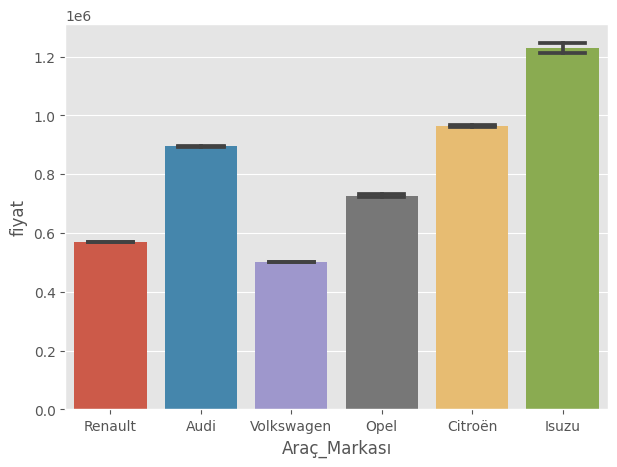

In [50]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x = veri["Araç_Markası"], y = veri["fiyat"],capsize=0.5)

<Axes: xlabel='Vites_Tipi', ylabel='fiyat'>

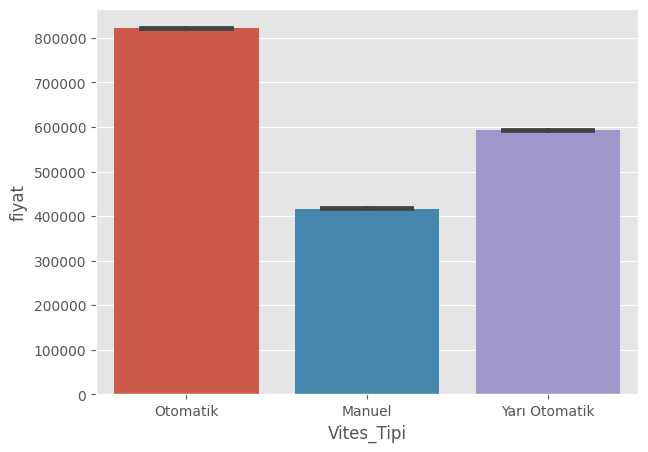

In [51]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x = veri["Vites_Tipi"], y = veri["fiyat"],capsize=0.5)

<Axes: xlabel='Yakit_Tipi', ylabel='fiyat'>

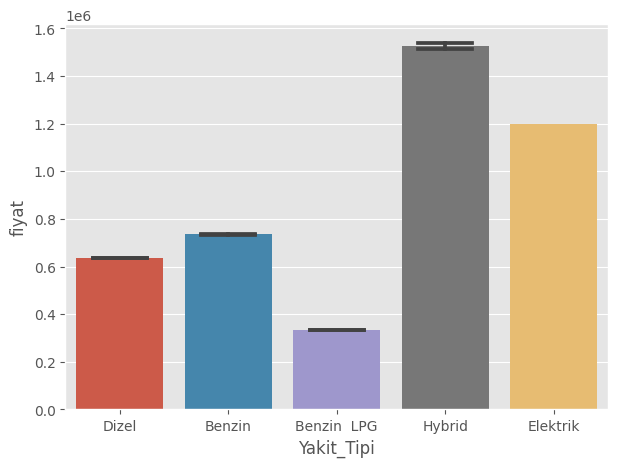

In [52]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x = veri["Yakit_Tipi"], y = veri["fiyat"],capsize=0.5)



*   Araç Modeli ve Markası: Farklı marka ve modeller farklı fiyat aralıklarına sahiptir.
*   Kilometre: Araç ne kadar yol yapmış, bunun fiyata etkisi olabilir.
*   Model Yılı: Araç ne kadar eski veya yeni, bu da fiyatı belirleyebilir.
*   Yakıt Tipi: Benzin, dizel veya hibrit gibi farklı yakıt türleri fiyatı etkileyebilir.
*   Motor Gücü: Araçların beygir gücü, performansı ve dolayısıyla fiyatı etkileyebilir.
*   Vites Tipi: Otomatik veya manuel vitesin fiyat üzerinde etkisi olabilir.








In [53]:
# Model yılından ilan tarihini çıkararak aracın yaşını hesaplama
veri['Arac_Yasi'] = veri['ilan_tarihi'].dt.year - veri['Model_Yili']

veri.head()

,ilan_id,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Model_Yili,Yakit_Tipi,Motor_Gucu,Vites_Tipi,il,ilce,Arac_Yasi
0,1080850207,830000.0,2023-05-26 09:23:29,1.5 dCi Icon,Renault,Megane,143000,2016,Dizel,110,Otomatik,İstanbul,Ümraniye,7
1,1101850722,905000.0,2023-05-26 09:23:13,1.5 dCi Icon,Renault,Megane,80000,2017,Dizel,110,Otomatik,İzmir,Konak,6
2,1101851921,1380000.0,2023-05-26 09:22:35,A3 Sedan 35 TFSI,Audi,A3,33000,2020,Benzin,150,Otomatik,İstanbul,Sarıyer,3
3,1090594643,530000.0,2023-05-26 09:21:55,1.4 TDI Trendline,Volkswagen,Polo,125000,2015,Dizel,75,Manuel,Kırklareli,Lüleburgaz,8
4,1101862946,685000.0,2023-05-26 09:21:08,1.5 dCi Icon,Renault,Megane,90500,2013,Dizel,110,Otomatik,İzmir,Bergama,10


In [54]:
# 'Model_Yili' sütununu sil
veri.drop(columns=['Model_Yili'], inplace=True)

In [55]:
# Veri setindeki benzersiz yakıt tiplerini alma
unique_yakit_tipleri = veri['Yakit_Tipi'].unique()

# Benzersiz yakıt tiplerini yazdırma
print(unique_yakit_tipleri)

['Dizel' 'Benzin' 'Benzin  LPG' 'Hybrid' None 'Elektrik']


In [56]:
# One-Hot Encoding yaparak Yakit_Tipi sütununu dönüştürme
veri = pd.get_dummies(veri, columns=['Yakit_Tipi'], prefix='Yakit')
veri.head()

,ilan_id,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Motor_Gucu,Vites_Tipi,il,ilce,Arac_Yasi,Yakit_Benzin,Yakit_Benzin LPG,Yakit_Dizel,Yakit_Elektrik,Yakit_Hybrid
0,1080850207,830000.0,2023-05-26 09:23:29,1.5 dCi Icon,Renault,Megane,143000,110,Otomatik,İstanbul,Ümraniye,7,0,0,1,0,0
1,1101850722,905000.0,2023-05-26 09:23:13,1.5 dCi Icon,Renault,Megane,80000,110,Otomatik,İzmir,Konak,6,0,0,1,0,0
2,1101851921,1380000.0,2023-05-26 09:22:35,A3 Sedan 35 TFSI,Audi,A3,33000,150,Otomatik,İstanbul,Sarıyer,3,1,0,0,0,0
3,1090594643,530000.0,2023-05-26 09:21:55,1.4 TDI Trendline,Volkswagen,Polo,125000,75,Manuel,Kırklareli,Lüleburgaz,8,0,0,1,0,0
4,1101862946,685000.0,2023-05-26 09:21:08,1.5 dCi Icon,Renault,Megane,90500,110,Otomatik,İzmir,Bergama,10,0,0,1,0,0


In [57]:
# One-Hot Encoding ile Vites_Tipi sütununu dönüştürme
veri = pd.get_dummies(veri, columns=['Vites_Tipi'], prefix='Vites')

In [58]:
veri.head()

,ilan_id,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Motor_Gucu,il,ilce,Arac_Yasi,Yakit_Benzin,Yakit_Benzin LPG,Yakit_Dizel,Yakit_Elektrik,Yakit_Hybrid,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik
0,1080850207,830000.0,2023-05-26 09:23:29,1.5 dCi Icon,Renault,Megane,143000,110,İstanbul,Ümraniye,7,0,0,1,0,0,0,1,0
1,1101850722,905000.0,2023-05-26 09:23:13,1.5 dCi Icon,Renault,Megane,80000,110,İzmir,Konak,6,0,0,1,0,0,0,1,0
2,1101851921,1380000.0,2023-05-26 09:22:35,A3 Sedan 35 TFSI,Audi,A3,33000,150,İstanbul,Sarıyer,3,1,0,0,0,0,0,1,0
3,1090594643,530000.0,2023-05-26 09:21:55,1.4 TDI Trendline,Volkswagen,Polo,125000,75,Kırklareli,Lüleburgaz,8,0,0,1,0,0,1,0,0
4,1101862946,685000.0,2023-05-26 09:21:08,1.5 dCi Icon,Renault,Megane,90500,110,İzmir,Bergama,10,0,0,1,0,0,0,1,0


In [59]:
# Yıpranma değeri hesaplama
veri['Yipranma_Degeri'] = veri['Kilometre'] /  veri['Arac_Yasi']
veri.head()

,ilan_id,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Motor_Gucu,il,ilce,Arac_Yasi,Yakit_Benzin,Yakit_Benzin LPG,Yakit_Dizel,Yakit_Elektrik,Yakit_Hybrid,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yipranma_Degeri
0,1080850207,830000.0,2023-05-26 09:23:29,1.5 dCi Icon,Renault,Megane,143000,110,İstanbul,Ümraniye,7,0,0,1,0,0,0,1,0,20428.571429
1,1101850722,905000.0,2023-05-26 09:23:13,1.5 dCi Icon,Renault,Megane,80000,110,İzmir,Konak,6,0,0,1,0,0,0,1,0,13333.333333
2,1101851921,1380000.0,2023-05-26 09:22:35,A3 Sedan 35 TFSI,Audi,A3,33000,150,İstanbul,Sarıyer,3,1,0,0,0,0,0,1,0,11000.0
3,1090594643,530000.0,2023-05-26 09:21:55,1.4 TDI Trendline,Volkswagen,Polo,125000,75,Kırklareli,Lüleburgaz,8,0,0,1,0,0,1,0,0,15625.0
4,1101862946,685000.0,2023-05-26 09:21:08,1.5 dCi Icon,Renault,Megane,90500,110,İzmir,Bergama,10,0,0,1,0,0,0,1,0,9050.0


In [60]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [61]:
veri

,ilan_id,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Motor_Gucu,il,ilce,Arac_Yasi,Yakit_Benzin,Yakit_Benzin LPG,Yakit_Dizel,Yakit_Elektrik,Yakit_Hybrid,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yipranma_Degeri
0,1080850207,830000.0,2023-05-26 09:23:29,1.5 dCi Icon,Renault,Megane,143000,110,İstanbul,Ümraniye,7,0,0,1,0,0,0,1,0,20428.571429
1,1101850722,905000.0,2023-05-26 09:23:13,1.5 dCi Icon,Renault,Megane,80000,110,İzmir,Konak,6,0,0,1,0,0,0,1,0,13333.333333
2,1101851921,1380000.0,2023-05-26 09:22:35,A3 Sedan 35 TFSI,Audi,A3,33000,150,İstanbul,Sarıyer,3,1,0,0,0,0,0,1,0,11000.0
3,1090594643,530000.0,2023-05-26 09:21:55,1.4 TDI Trendline,Volkswagen,Polo,125000,75,Kırklareli,Lüleburgaz,8,0,0,1,0,0,1,0,0,15625.0
4,1101862946,685000.0,2023-05-26 09:21:08,1.5 dCi Icon,Renault,Megane,90500,110,İzmir,Bergama,10,0,0,1,0,0,0,1,0,9050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521008,1101864569,360000.0,2023-05-26 09:28:13,1.4 Authentique,Renault,Megane,235000,98,Tokat,Turhal,16,0,1,0,0,0,1,0,0,14687.5
521009,1101751328,720000.0,2023-05-26 09:27:09,1.2 TSI Lounge,Volkswagen,Polo,57000,90,İstanbul,Çekmeköy,7,1,0,0,0,0,0,1,0,8142.857143
521010,1101865698,469500.0,2023-05-26 09:26:38,1.4 TDI Trendline,Volkswagen,Polo,205000,75,Bitlis,Tatvan,8,0,0,1,0,0,1,0,0,25625.0
521011,1101865188,997500.0,2023-05-26 09:26:09,1.5 Blue DCI Touch,Renault,Megane,22000,115,Ordu,Fatsa,3,0,0,1,0,0,0,1,0,7333.333333


In [62]:
veri_fit = veri.apply(preprocessing.LabelEncoder().fit_transform)

In [63]:
veri_fit

,ilan_id,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Motor_Gucu,il,ilce,Arac_Yasi,Yakit_Benzin,Yakit_Benzin LPG,Yakit_Dizel,Yakit_Elektrik,Yakit_Hybrid,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yipranma_Degeri
0,144949,7225,280221,89,4,5,18182,21,1602,5406,7,0,0,1,0,0,0,1,0,30518
1,245781,7888,280220,89,4,5,10739,21,1608,2892,6,0,0,1,0,0,0,1,0,19233
2,245791,10201,280219,242,0,0,4644,31,1602,4011,3,1,0,0,0,0,0,1,0,13707
3,187108,4475,280218,67,5,6,16463,6,926,3260,8,0,0,1,0,0,1,0,0,23781
4,245842,5945,280217,89,4,5,12271,21,1608,873,10,0,0,1,0,0,0,1,0,9279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521008,245854,2664,280225,34,4,5,24789,13,1284,4508,16,0,1,0,0,0,1,0,0,21964
521009,245331,6269,280224,22,5,6,7716,10,1602,5224,7,1,0,0,0,0,0,1,0,7540
521010,245863,3836,280223,67,5,6,22957,6,271,4330,8,0,0,1,0,0,1,0,0,34980
521011,245860,8635,280222,75,4,5,3135,22,1048,1736,3,0,0,1,0,0,0,1,0,6129


In [64]:
veri_fit.drop(columns=['ilan_id'], inplace=True)

In [65]:
X = veri_fit.drop('fiyat', axis=1)
y = veri_fit["fiyat"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20)

In [66]:
veri_fit.head()

,fiyat,ilan_tarihi,Araç_Modeli,Araç_Markası,Araç_Seri,Kilometre,Motor_Gucu,il,ilce,Arac_Yasi,Yakit_Benzin,Yakit_Benzin LPG,Yakit_Dizel,Yakit_Elektrik,Yakit_Hybrid,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yipranma_Degeri
0,7225,280221,89,4,5,18182,21,1602,5406,7,0,0,1,0,0,0,1,0,30518
1,7888,280220,89,4,5,10739,21,1608,2892,6,0,0,1,0,0,0,1,0,19233
2,10201,280219,242,0,0,4644,31,1602,4011,3,1,0,0,0,0,0,1,0,13707
3,4475,280218,67,5,6,16463,6,926,3260,8,0,0,1,0,0,1,0,0,23781
4,5945,280217,89,4,5,12271,21,1608,873,10,0,0,1,0,0,0,1,0,9279


Linear Regression



Model Score: 0.9109589095634745
Mean Squared Error (MSE): 623797.8169405551
R-squared (R^2): 0.9109589095634745


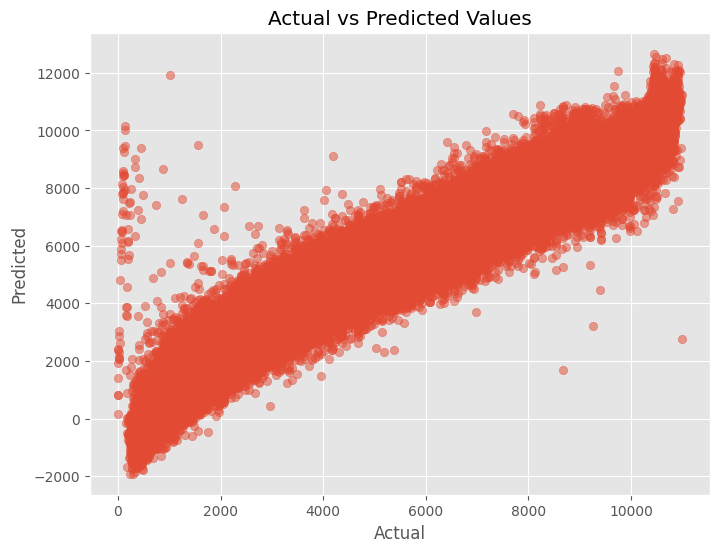

In [67]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

score_lineer = linear_reg.score(X_test, y_test)
print(f"Model Score: {score_lineer}")

y_pred = linear_reg.predict(X_test)

mse_lineer = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_lineer}")

r_squared_lineer = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r_squared_lineer}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

RandomForestRegressor

Model Score: 0.9661316954413852
Mean Squared Error (MSE): 237272.189093444
R-squared (R^2): 0.9661316954413852


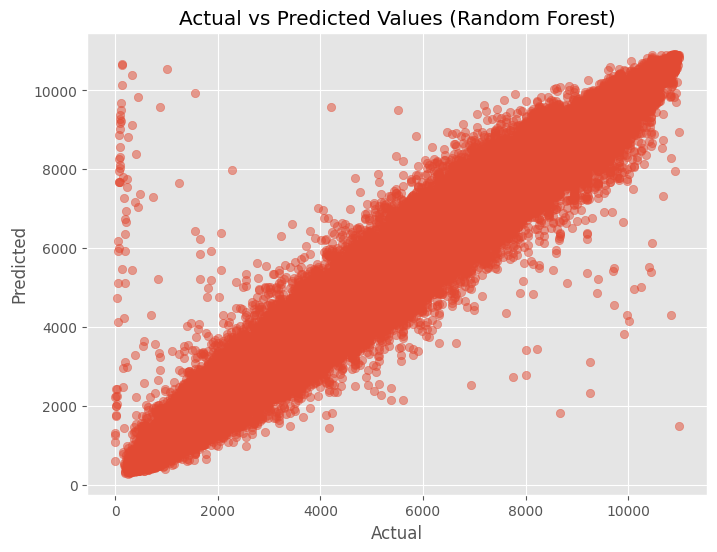

In [68]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

score_rfr = rf_reg.score(X_test, y_test)
print(f"Model Score: {score_rfr}")


y_pred = rf_reg.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_rfr}")

r_squared_rfr = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r_squared_rfr}")

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()

Model Score: 0.9665977275312037
Mean Squared Error (MSE): 234007.29421370119
R-squared (R^2): 0.9665977275312037


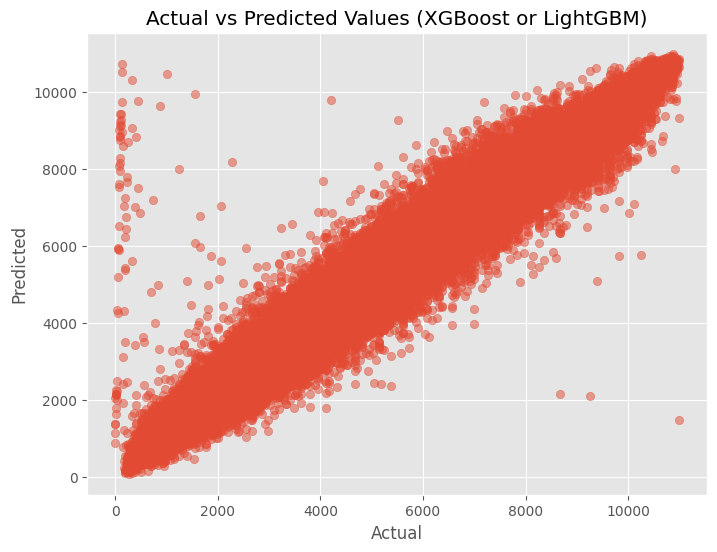

In [69]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

xgb_reg = XGBRegressor()

xgb_reg.fit(X_train, y_train)

score_xgb = xgb_reg.score(X_test, y_test)
print(f"Model Score: {score_xgb}")

y_pred = xgb_reg.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_xgb}")

r_squared_xgb = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r_squared_xgb}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values (XGBoost or LightGBM)")
plt.show()

Gradient Boosting Score: 0.9566675103146043
Mean Squared Error (MSE): 234007.29421370119
R-squared (R^2): 0.9665977275312037


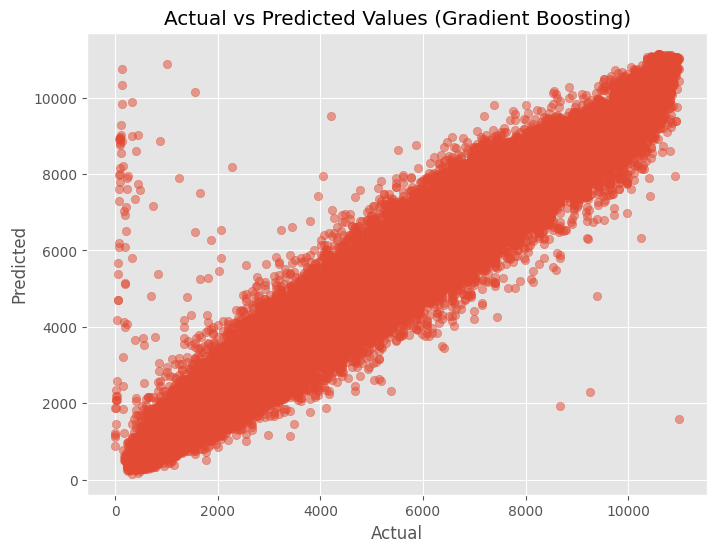

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

gb_reg = GradientBoostingRegressor()

gb_reg.fit(X_train, y_train)

y_pred_gb = gb_reg.predict(X_test)

score_gbr = gb_reg.score(X_test, y_test)
print(f"Gradient Boosting Score: {score_gbr}")

mse_gbr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_gbr}")

r_squared_gbr = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r_squared_gbr}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values (Gradient Boosting)")
plt.show()

In [71]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBRegressor', 'Gradient Boosting'],
    'MSE': [mse_lineer, mse_rfr, mse_xgb, mse_gbr],
    'R-squared': [r_squared_lineer, r_squared_rfr, r_squared_xgb, r_squared_gbr]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model            MSE  R-squared
0  Linear Regression  623797.816941   0.910959
1      Random Forest  237272.189093   0.966132
2       XGBRegressor  234007.294214   0.966598
3  Gradient Boosting  234007.294214   0.966598
